# Support Vector Machine Notebook

This notebook uses a csv file that contains annotations of the PI-CAI dataset. It is downloaded from: https://github.com/DIAGNijmegen/picai_labels/tree/main/clinical_information<br>
Prepared for the dissertation for <b>MSc Software Engineering</b>.<br>
Topic: <b>Enhancing Prostate Cancer Diagnosis through a Multimodal AI Framework: Integrating Deep Learning and Ensemble Techniques</b>.
<br><br>
<span style="color:red;">Submitted by: <b>Mihir Sontake (23241713)</b></span>. <br>

A brief description of columns in dataset:
- `patient-id`: id of the patient
- `study-id`: id of the study
- `mri-date`: date when mri was taken for the patient
- `patient_age`: age of the patient
- `psa`: level of the psa (Prostate-Specific Antigen) in unit: ng/mL
- `psad`: Prostate-specific antigen density in unit: ng/mL²
- `prostate_volume`: volume of the prostate in unit: mL
- `histopath_type`: procedure used for taking medical sample
- `lesion_GS`: gleason score for a lesion
- `lesion_ISUP`: ISUP value of lesion
- `case_ISUP`: ISUP value of patient (Target variable)
- `case_csPCa`: Is the PCa present or not (Target variable)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("fivethirtyeight")

The dataset is loaded.

In [2]:
# Load the dataset
df = pd.read_csv("marksheet.csv")

In [3]:
seed = 42

## 1. Exploratory Data Analysis

In [4]:
# Display 5 records
df.head(5)

,patient_id,study_id,mri_date,patient_age,psa,psad,prostate_volume,histopath_type,lesion_GS,lesion_ISUP,case_ISUP,case_csPCa
0,10000,1000000,02-07-2019,73,7.7,NaN,55.0,MRBx,0+0,0,0,NO
1,10001,1000001,27-05-2016,64,8.7,0.09,102.0,NaN,NaN,NaN,0,NO
2,10002,1000002,18-04-2021,58,4.2,0.06,74.0,NaN,NaN,NaN,0,NO
3,10003,1000003,05-04-2019,72,13.0,NaN,71.5,SysBx,0+0,0,0,NO
4,10004,1000004,21-10-2020,67,8.0,0.10,78.0,SysBx+MRBx,"0+0,0+0","0,0",0,NO


In [5]:
# Number of Records
record_count = df.shape[0]
print(f'Number of records: {record_count}')

Number of records: 1500


In [6]:
# Summary statistics
print("\nSummary statistics:")
df.describe()


Summary statistics:


,patient_id,study_id,patient_age,psa,psad,prostate_volume,case_ISUP
count,1500.000000,1.500000e+03,1500.000000,1460.000000,1049.000000,1473.000000,1500.000000
mean,10735.602667,1.000750e+06,65.595333,11.932397,0.224662,65.045472,0.942000
std,425.311791,4.331570e+02,7.191527,14.939071,0.404288,36.449618,1.333099
min,10000.000000,1.000000e+06,35.000000,0.100000,0.010000,4.000000,0.000000
25%,10368.750000,1.000375e+06,61.000000,5.882500,0.090000,40.000000,0.000000
50%,10733.500000,1.000750e+06,66.000000,8.500000,0.140000,57.000000,0.000000
75%,11101.250000,1.001124e+06,70.000000,13.000000,0.220000,80.000000,2.000000
max,11475.000000,1.001499e+06,92.000000,224.000000,7.000000,308.000000,5.000000


In [7]:
# Information about the dataset
print("\nInformation about the dataset:\n")
df.info()


Information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_id       1500 non-null   int64  
 1   study_id         1500 non-null   int64  
 2   mri_date         1500 non-null   object 
 3   patient_age      1500 non-null   int64  
 4   psa              1460 non-null   float64
 5   psad             1049 non-null   float64
 6   prostate_volume  1473 non-null   float64
 7   histopath_type   1001 non-null   object 
 8   lesion_GS        1001 non-null   object 
 9   lesion_ISUP      1001 non-null   object 
 10  case_ISUP        1500 non-null   int64  
 11  case_csPCa       1500 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 140.8+ KB


In [8]:
# Check for missing values
print("\nMissing values:\n")
print(df.isnull().sum())


Missing values:

patient_id           0
study_id             0
mri_date             0
patient_age          0
psa                 40
psad               451
prostate_volume     27
histopath_type     499
lesion_GS          499
lesion_ISUP        499
case_ISUP            0
case_csPCa           0
dtype: int64


In [9]:
## Print all columns

columns = df.columns.tolist()
print("column names:", columns, "\n")

## Print number of columns in dataset

columns_length = len(df.columns.tolist())
print("number of columns:", columns_length, "\n")

column names: ['patient_id', 'study_id', 'mri_date', 'patient_age', 'psa', 'psad', 'prostate_volume', 'histopath_type', 'lesion_GS', 'lesion_ISUP', 'case_ISUP', 'case_csPCa'] 

number of columns: 12 



Identifying Numerical Columns and Categorical Columns.

In [10]:
numerical_columns_df = df.select_dtypes(include=['float64', 'int64'])
categorical_columns_df = df.select_dtypes(include=['object'])

In [11]:
numerical_columns_length = len(numerical_columns_df.columns.tolist())
print("number of numerical columns:", numerical_columns_length, "\n")
categorical_columns_length = len(categorical_columns_df.columns.tolist())
print("number of categorical columns:", categorical_columns_length, "\n")

number of numerical columns: 7 

number of categorical columns: 5 



Is the sum of numerical and categorical columns equal to the total number of columns?

In [12]:
print(numerical_columns_length + categorical_columns_length == columns_length)

True


Count the number of values in each class.

In [13]:
class_counts = df['case_csPCa'].value_counts()
print('Number of values in each class:\n')
print(class_counts,'\n')

# Calculate the percentages of imbalance
print('Percentage of values in each class:\n')
percentages = class_counts / class_counts.sum() * 100
print(percentages, '\n')

Number of values in each class:

case_csPCa
NO     1075
YES     425
Name: count, dtype: int64 

Percentage of values in each class:

case_csPCa
NO     71.666667
YES    28.333333
Name: count, dtype: float64 



As we can see, the dataset is imbalanced towards NO or cases having no clinically significant PCa, with 71.67% of NO records and 28.33% of YES records.

### 1. a. Data Visualizations

Count of Labels of case_csPCa

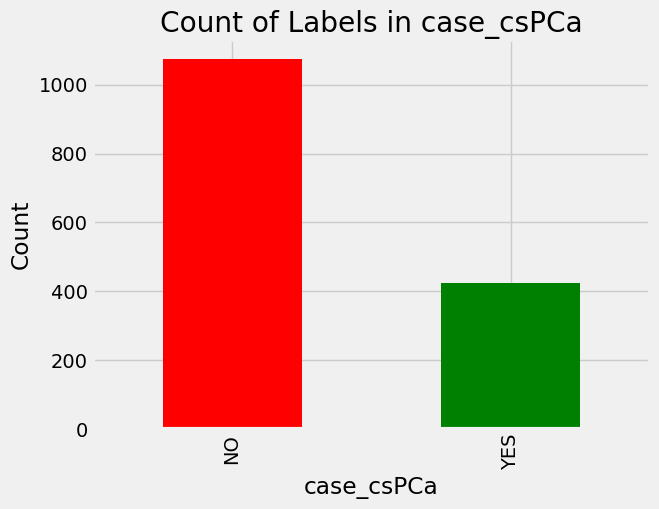

In [14]:
df['case_csPCa'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Count of Labels in case_csPCa')
plt.xlabel('case_csPCa')
plt.ylabel('Count')
plt.show()

Distribution of Numeric Variables

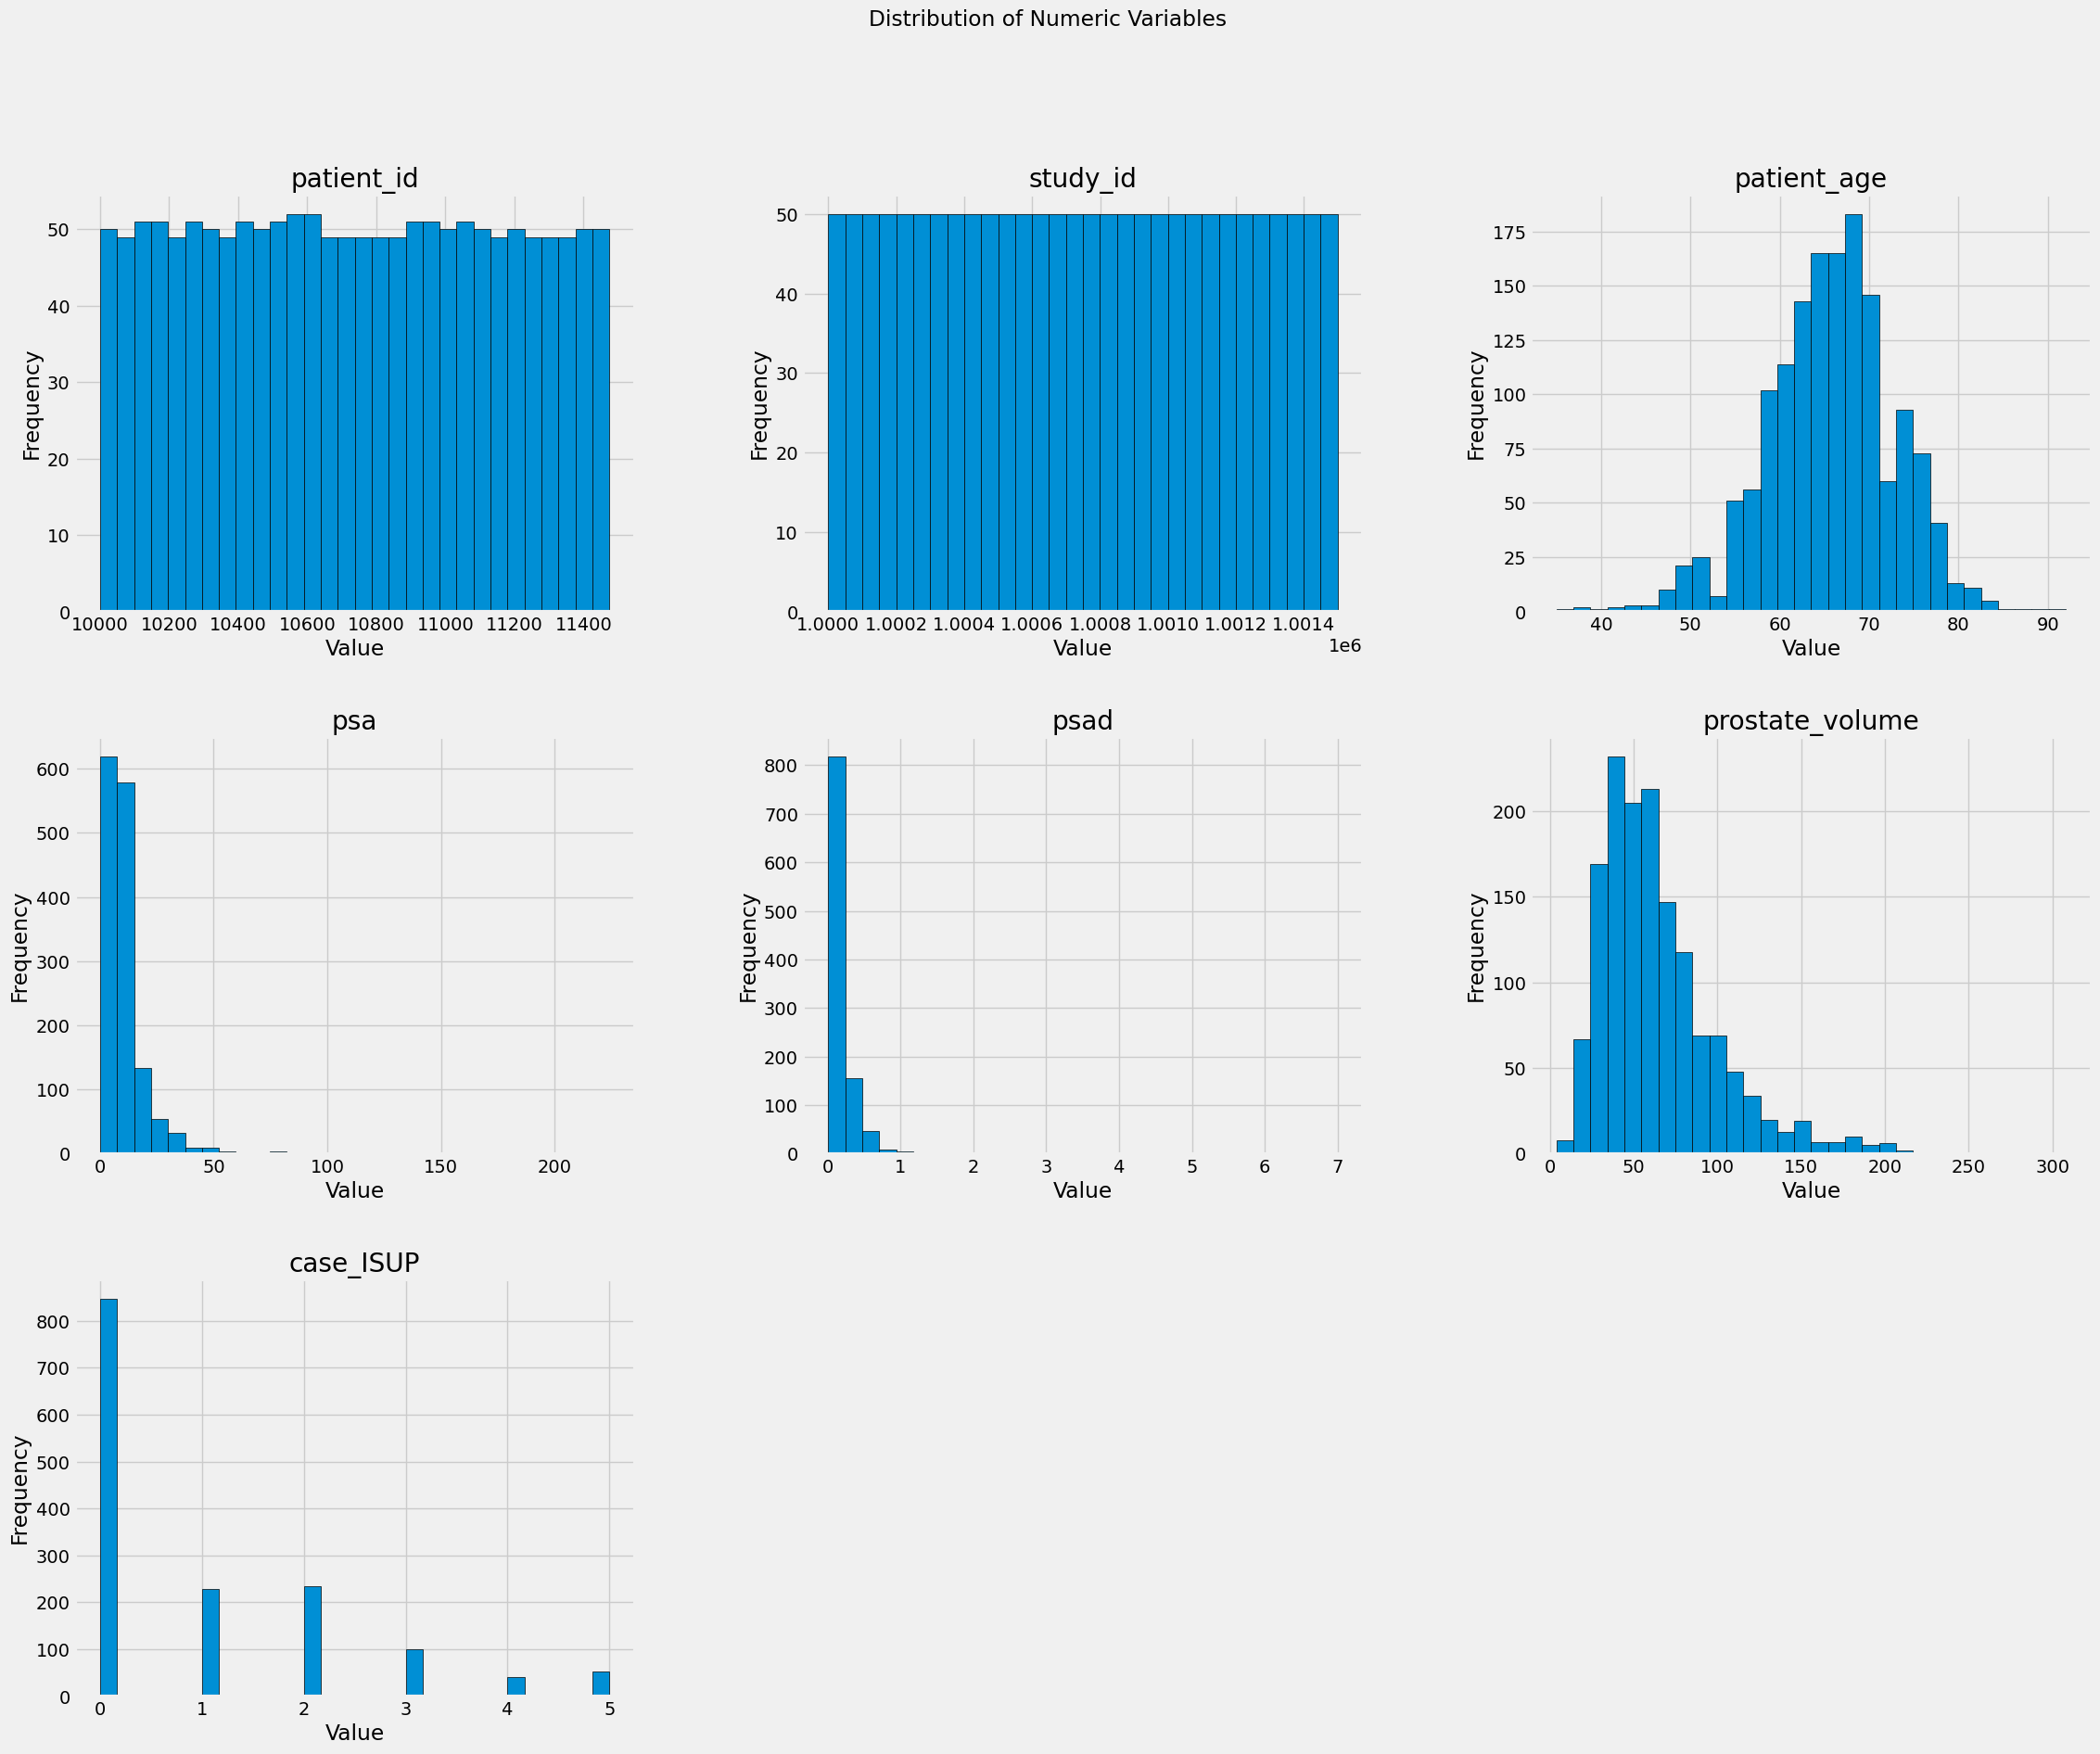

In [15]:
numerical_columns_df.hist(bins=30, figsize=(25, 20), edgecolor='black')
plt.suptitle('Distribution of Numeric Variables')

# Adding xlabel and ylabel to each plot
for ax in plt.gcf().axes:
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.show()

Correlation Heatmap

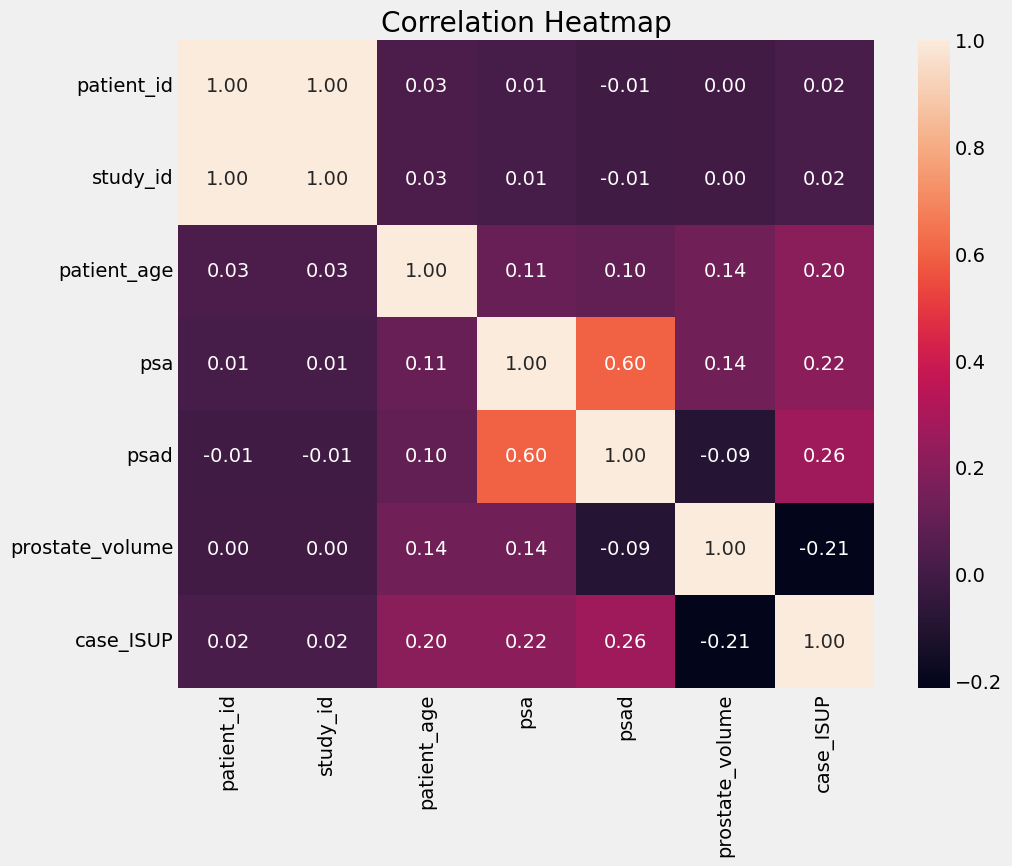

In [16]:
# Plotting the correlation heatmap with 2 decimal points in annotations
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_columns_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

We can observe the following correlations from the heatmap.
- `case_ISUP` is negatively correlated with `prostate_volume`.
- `case_ISUP` is having positive correlation with `psad`.
- `case_ISUP` is having positive correlation with `patient_age`.
- `case_ISUP` is having positive correlation with `psa`.
- `psad` is having high correlation with `psa`.

We will look at boxplots of numerical columns to identify outliers.

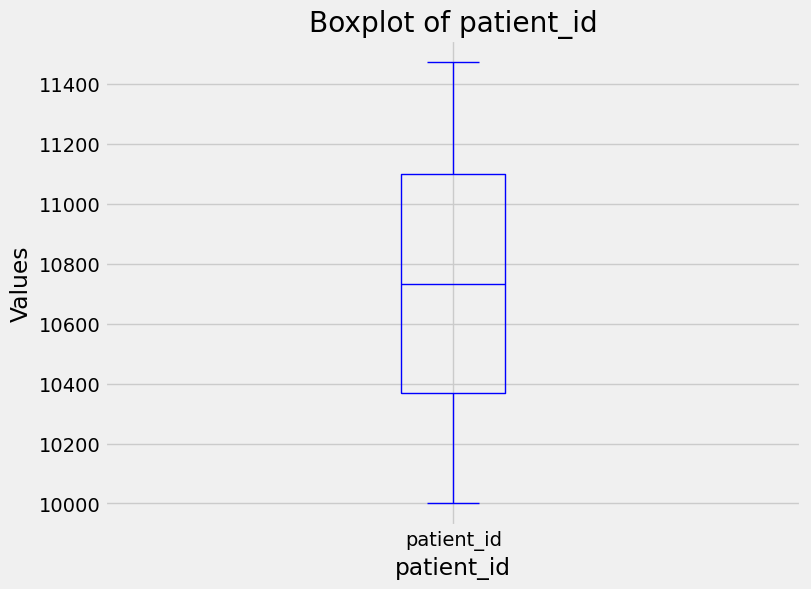

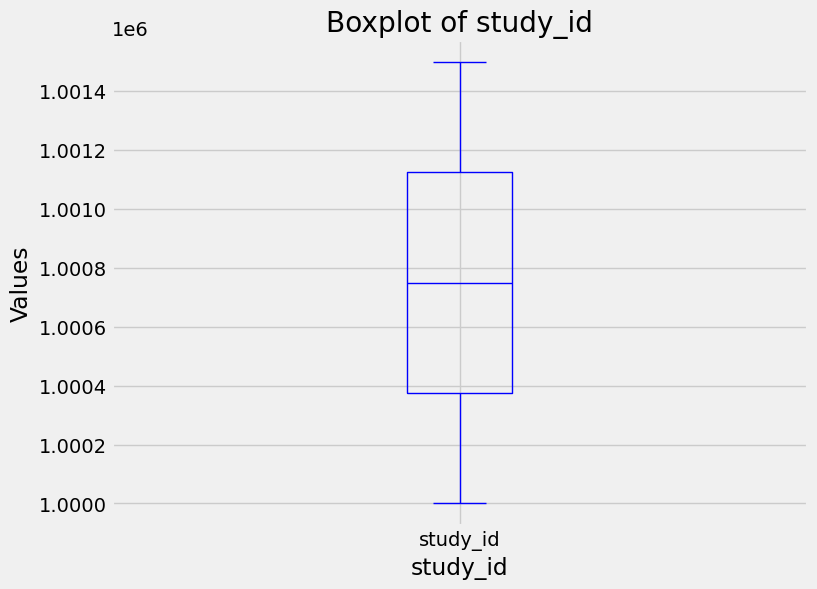

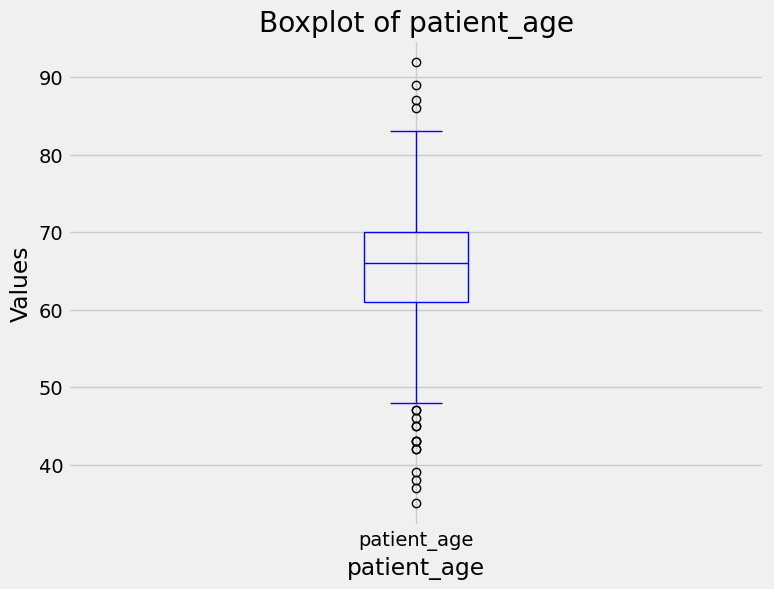

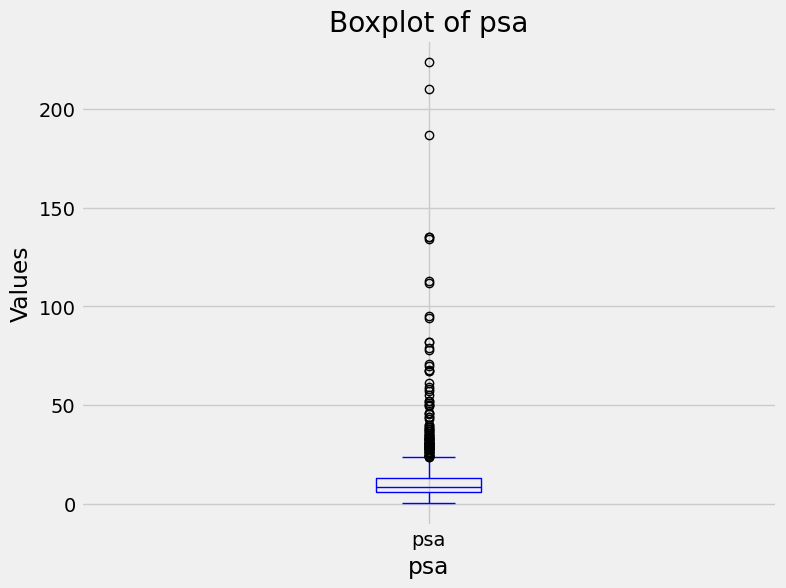

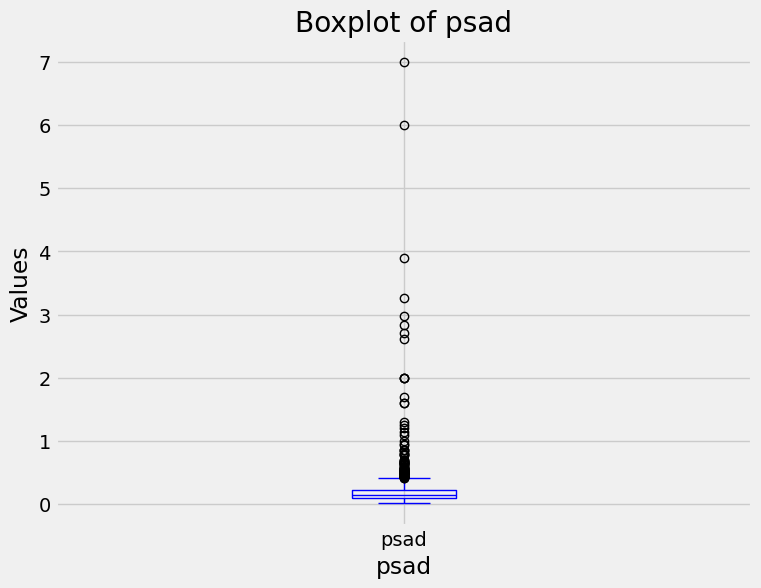

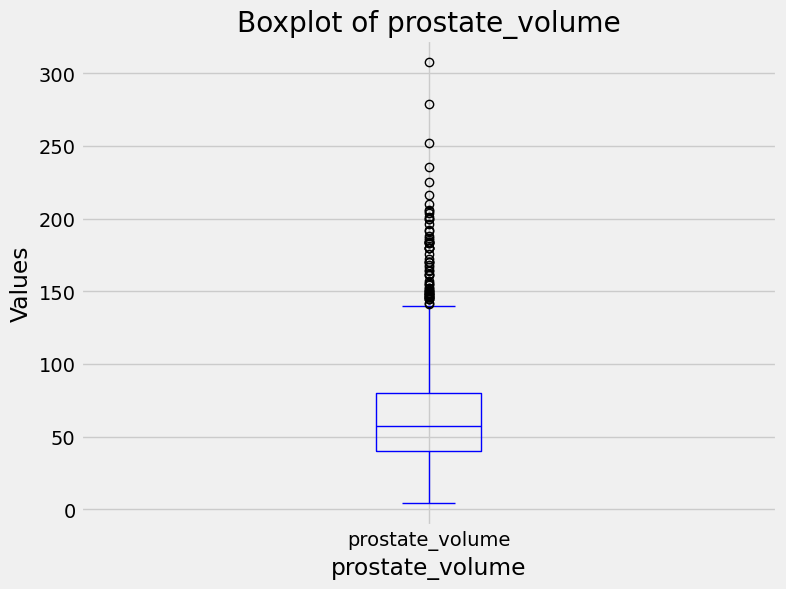

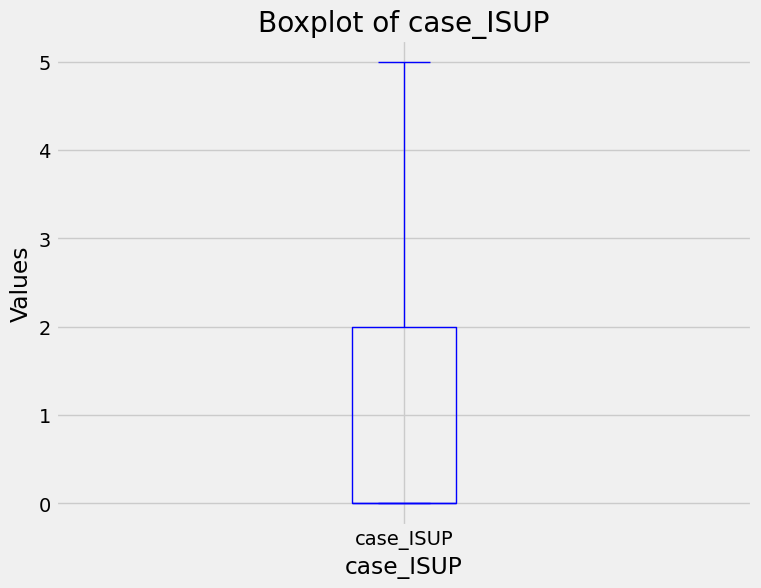

In [17]:
for col in numerical_columns_df.columns.tolist():
    plt.figure(figsize=(8, 6))
    df.boxplot(column=col, color='blue')
    plt.title('Boxplot of '+ col)
    plt.ylabel('Values')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

Boxplots of `psa`, `psad`, `prostate_volume`, and `patient_age` have outliers.

Boxplots for Numeric Variables vs. Target Variable

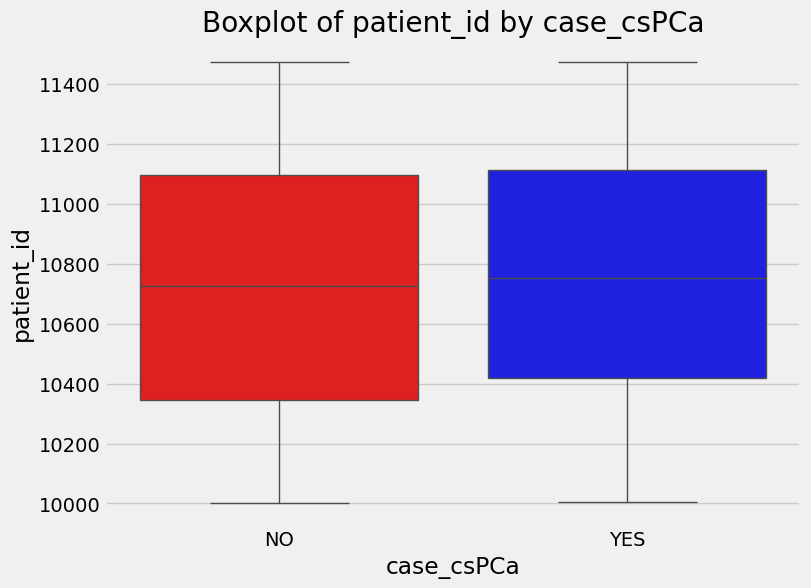

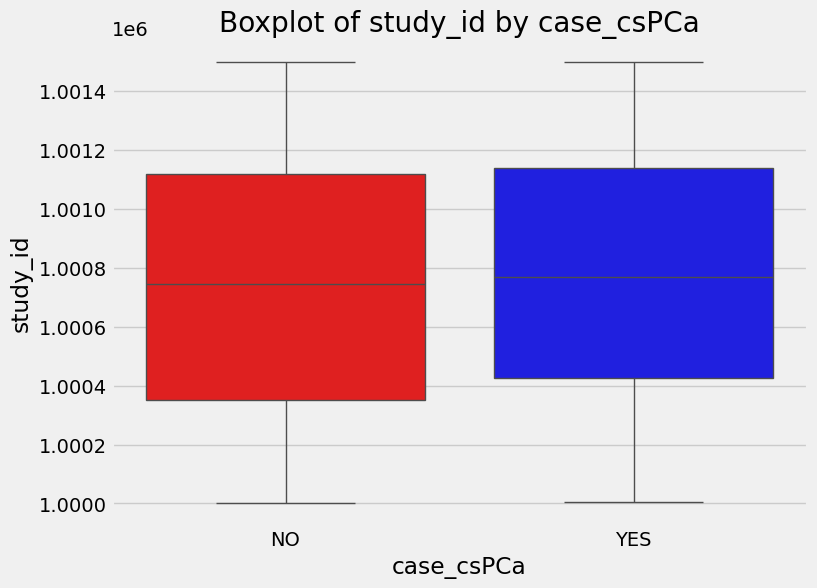

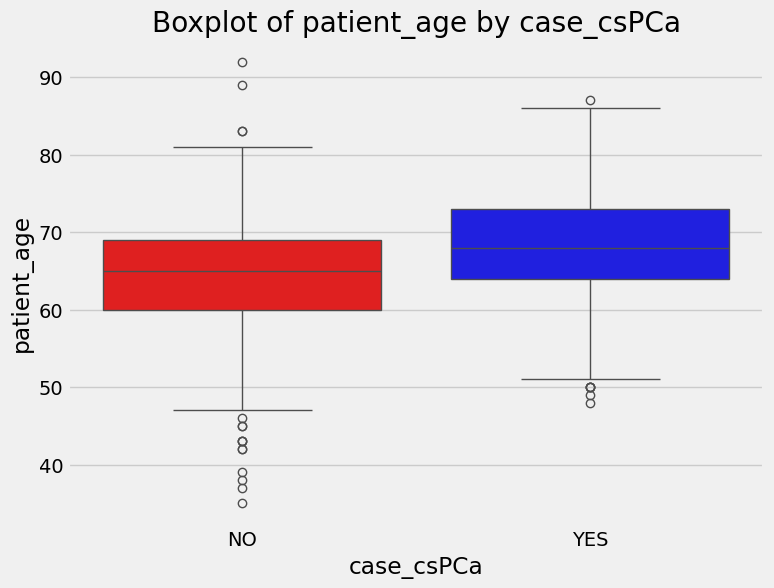

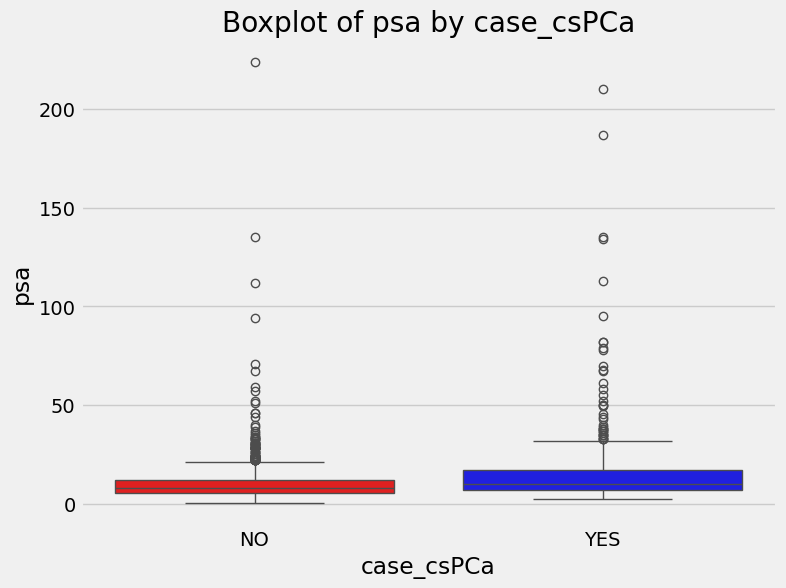

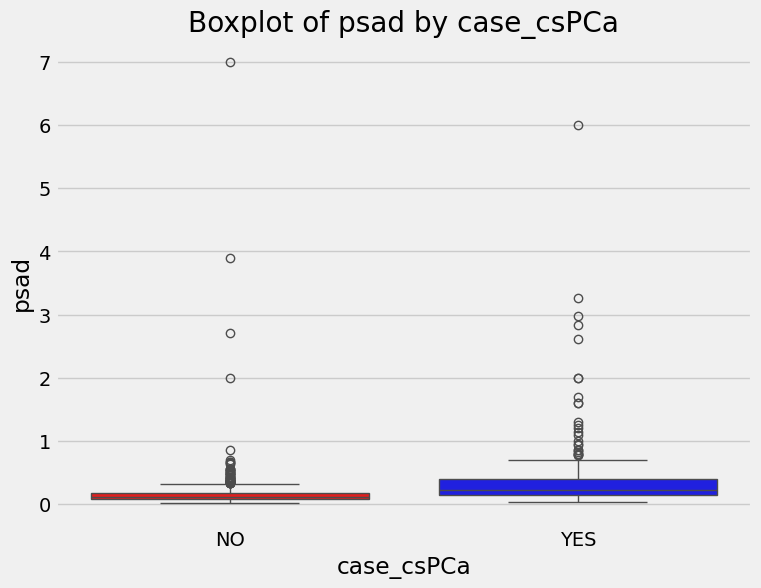

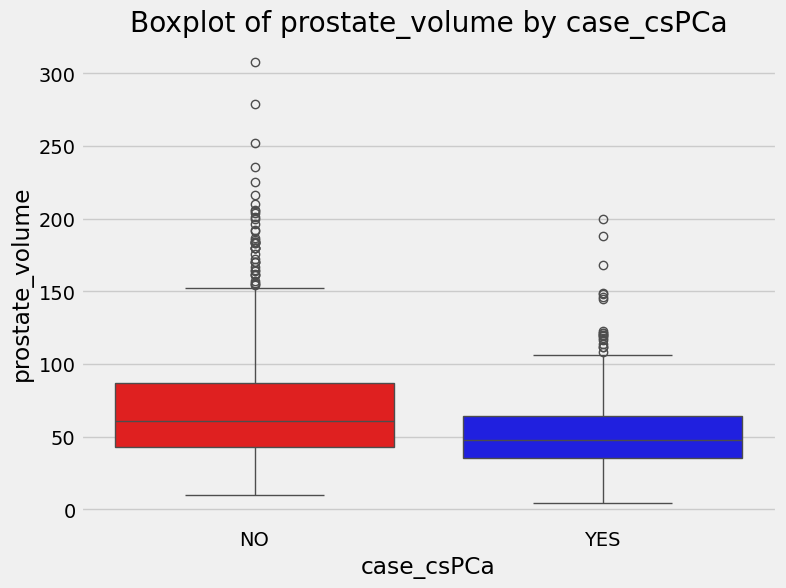

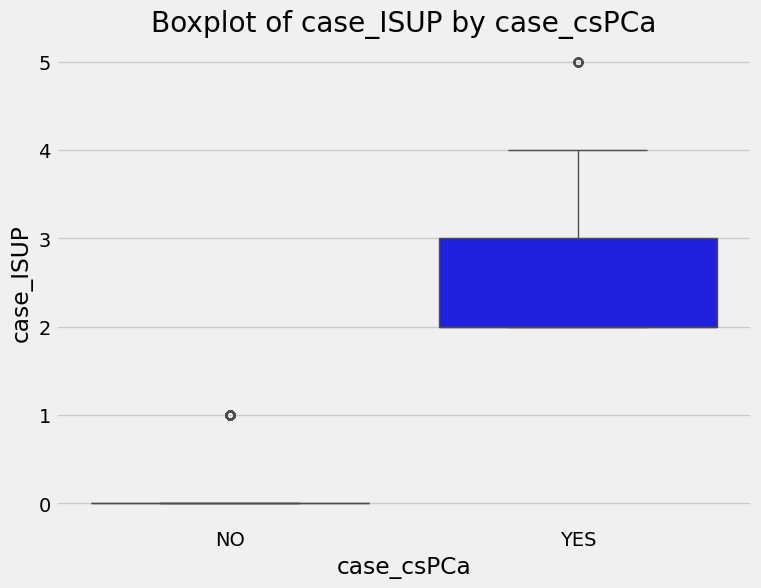

In [18]:
for col in numerical_columns_df.columns.tolist():
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='case_csPCa', y=col, data=df, hue='case_csPCa', palette=['red', 'blue'], legend=False)
    plt.title(f'Boxplot of {col} by case_csPCa')
    plt.show()

Count Plots for Variables.

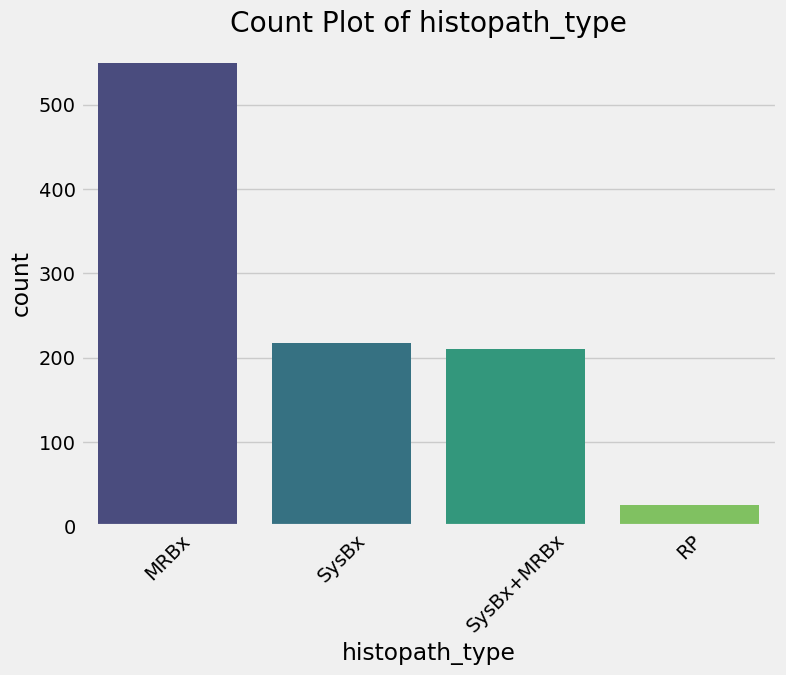

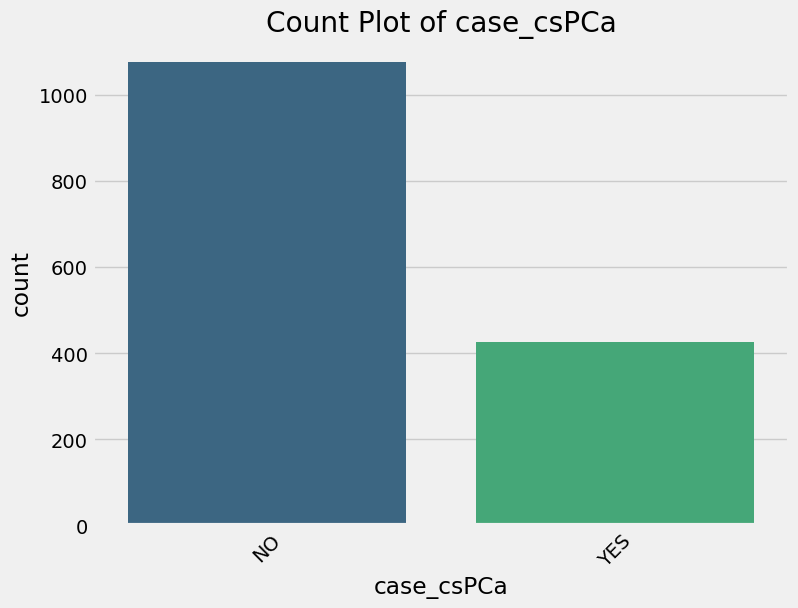

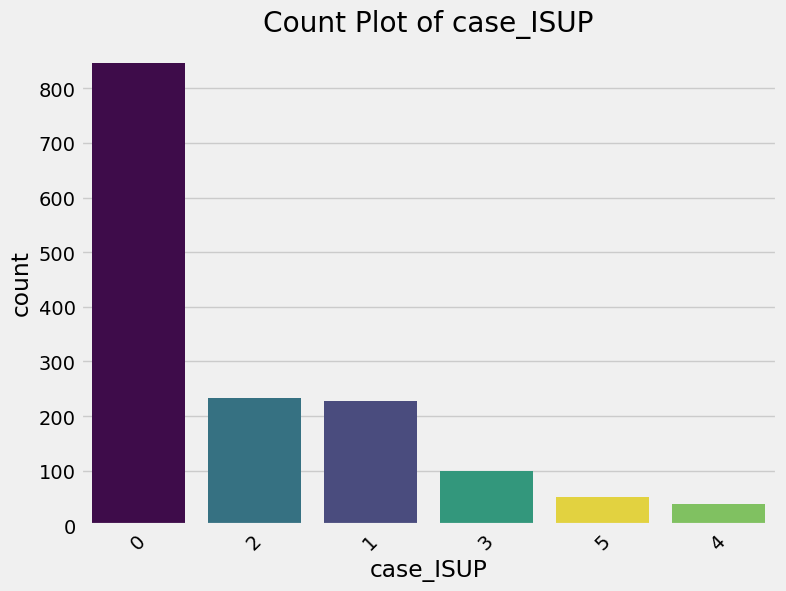

In [19]:
for col in ['histopath_type', 'case_csPCa', 'case_ISUP']:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, hue = col, palette='viridis', legend = False)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

Missing Values Analysis.

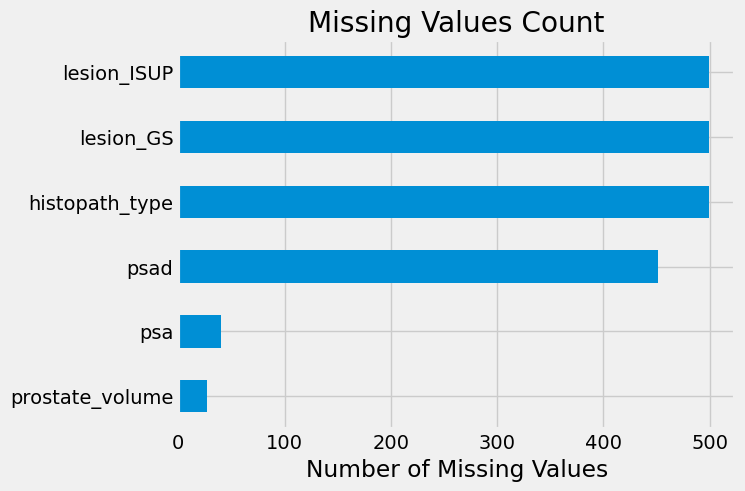

In [20]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)

missing_values.plot(kind='barh')
plt.title('Missing Values Count')
plt.xlabel('Number of Missing Values')
plt.show()

Missing Values:
- We can see close to 500 missing values in 3 columns - `lesion_ISUP`, `lesion_GS`, and `histopath_type`.
- Missing values for `psad` are close to 450.
- Missing values for `psa` and `prostate_volume` are 40 and 27 respectively.

## 2. Data Preparation

Encoding case_csPCa Categorical Feature into Numerical Feature for the Model.

In [21]:
# Encode 'No' to 0 and 'Yes' to 1
mapper = {'YES': 1, 'NO': 0}
df['case_csPCa'] = df['case_csPCa'].replace(mapper)

In [22]:
# Print the class counts after encoding
class_counts = df['case_csPCa'].value_counts()
print('Number of values in each class:')
print(class_counts)

Number of values in each class:
case_csPCa
0    1075
1     425
Name: count, dtype: int64


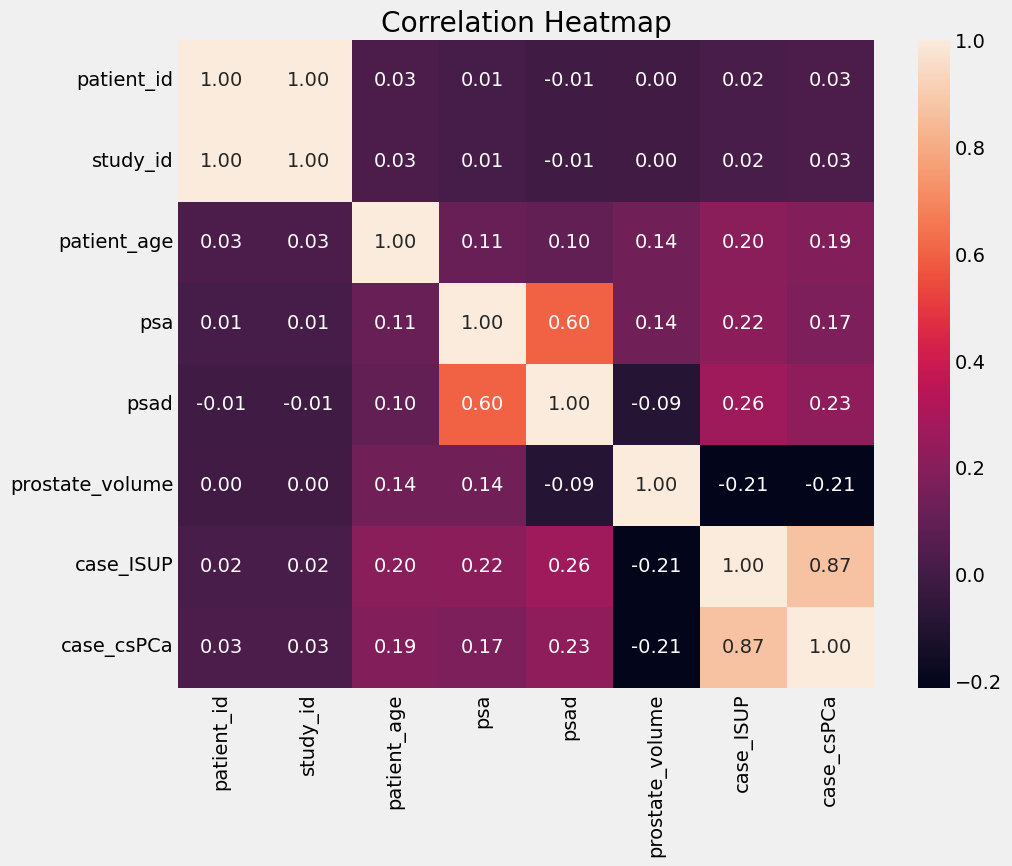

In [23]:
# Plotting the correlation heatmap with 2 decimal points in annotations
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

We can observe the following correlations from the heatmap.
- `case_ISUP` is negatively correlated with `prostate_volume`.
- `case_ISUP` is having positive correlation with `psad`.
- `case_ISUP` is having positive correlation with `patient_age`.
- `case_ISUP` is having positive correlation with `psa`.
- `psad` is having high correlation with `psa`.
- `case_ISUP` is having high correlation with `case_csPCa`.
- `case_csPCa` is negatively correlated with `prostate_volume`.
- `case_csPCa` is having positive correlation with `psad`.
- `case_csPCa` is having positive correlation with `patient_age`.
- `case_csPCa` is having positive correlation with `psa`.

In [24]:
df.isnull().sum()

patient_id           0
study_id             0
mri_date             0
patient_age          0
psa                 40
psad               451
prostate_volume     27
histopath_type     499
lesion_GS          499
lesion_ISUP        499
case_ISUP            0
case_csPCa           0
dtype: int64

Drop columns `study_id`,`patient_id`,`mri_date`, and  `case_csPCa`.

In [25]:
df.drop(columns=['case_csPCa','patient_id','study_id','mri_date'], axis=1, inplace=True)


Drop any rows with missing values with `histopath_type`, `lesion_GS`, and `lesion_ISUP`.

In [26]:
df.dropna(subset=['histopath_type'], inplace=True)


In [27]:
df.isnull().sum()

patient_age          0
psa                 18
psad               395
prostate_volume     20
histopath_type       0
lesion_GS            0
lesion_ISUP          0
case_ISUP            0
dtype: int64

Now, we impute missing values in `psad`.

In [28]:
df['psad_calc'] = df['psa'] / df['prostate_volume']

In [29]:
df['psad_calc'].isnull().sum()

34

In [30]:
df['psad'].fillna(df['psad_calc'], inplace=True)

In [31]:
df.drop(columns=['psad_calc'], inplace=True)

In [32]:
df.isnull().sum()

patient_age         0
psa                18
psad               34
prostate_volume    20
histopath_type      0
lesion_GS           0
lesion_ISUP         0
case_ISUP           0
dtype: int64

In [33]:
df.dropna(inplace=True)

In [34]:
df.isnull().sum()

patient_age        0
psa                0
psad               0
prostate_volume    0
histopath_type     0
lesion_GS          0
lesion_ISUP        0
case_ISUP          0
dtype: int64

No missing value, so our task is complete.

In [35]:
df.describe()

,patient_age,psa,psad,prostate_volume,case_ISUP
count,967.000000,967.000000,967.000000,967.000000,967.000000
mean,66.391934,13.166484,0.283081,58.211954,1.403309
std,7.027045,17.154305,0.483636,31.309094,1.423228
min,42.000000,0.400000,0.010000,4.000000,0.000000
25%,62.000000,6.100000,0.114435,37.000000,0.000000
50%,67.000000,9.000000,0.180000,50.470000,1.000000
75%,71.000000,13.750000,0.280000,70.000000,2.000000
max,87.000000,224.000000,6.900000,225.000000,5.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_age      967 non-null    int64  
 1   psa              967 non-null    float64
 2   psad             967 non-null    float64
 3   prostate_volume  967 non-null    float64
 4   histopath_type   967 non-null    object 
 5   lesion_GS        967 non-null    object 
 6   lesion_ISUP      967 non-null    object 
 7   case_ISUP        967 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 68.0+ KB


Now, task is to convert all categorical columns to numerical.

One Hot Encode the `histopath_type` column.

In [37]:
df_encoded = pd.get_dummies(df, columns=['histopath_type'], dtype=int, prefix='histopath')

In [38]:
df_encoded.head()

,patient_age,psa,psad,prostate_volume,lesion_GS,lesion_ISUP,case_ISUP,histopath_MRBx,histopath_RP,histopath_SysBx,histopath_SysBx+MRBx
0,73,7.7,0.140000,55.0,0+0,0,0,1,0,0,0
3,72,13.0,0.181818,71.5,0+0,0,0,0,0,1,0
4,67,8.0,0.100000,78.0,"0+0,0+0","0,0",0,0,0,0,1
5,64,12.1,0.240000,51.0,"4+3,0+0","3,0",3,1,0,0,0
6,73,6.2,0.230000,27.0,"0+0,3+3","0,1",1,0,0,0,1


Convert the `lesion_GS` column to a new column `max_lesion_GS` to a number by summing the numbers and taking the maximum sum of all lesion sums.

In [39]:
def max_lesion_sum(lesion_gs):
    # Split by comma to handle multiple lesions
    lesions = lesion_gs.split(',')
    max_sum = 0
    for lesion in lesions:
        # Split by '+' to get the two numbers and sum them
        nums = lesion.split('+')
        if(nums[0].isdigit() == False):
            continue
        lesion_sum = int(nums[0]) + int(nums[1])
        # Update the maximum sum
        if lesion_sum > max_sum:
            max_sum = lesion_sum
    return max_sum

In [40]:
df_encoded['max_lesion_GS'] = df_encoded['lesion_GS'].apply(max_lesion_sum)

In [41]:
df_encoded.head()

,patient_age,psa,psad,prostate_volume,lesion_GS,lesion_ISUP,case_ISUP,histopath_MRBx,histopath_RP,histopath_SysBx,histopath_SysBx+MRBx,max_lesion_GS
0,73,7.7,0.140000,55.0,0+0,0,0,1,0,0,0,0
3,72,13.0,0.181818,71.5,0+0,0,0,0,0,1,0,0
4,67,8.0,0.100000,78.0,"0+0,0+0","0,0",0,0,0,0,1,0
5,64,12.1,0.240000,51.0,"4+3,0+0","3,0",3,1,0,0,0,7
6,73,6.2,0.230000,27.0,"0+0,3+3","0,1",1,0,0,0,1,6


Convert the `lesion_ISUP` to a new column `max_lesion_ISUP` to find the maximum value of a lesion ISUP.

In [42]:
def max_lesion_isup(lesion_isup):
    # Split by comma to handle multiple lesions
    lesions = lesion_isup.split(',')
    max = 0
    for lesion in lesions:
        lesion = int(lesion)
        # Update the maximum sum
        if lesion > max:
            max = lesion
    return max

In [43]:
df_encoded['max_lesion_ISUP'] = df_encoded['lesion_ISUP'].apply(max_lesion_isup)

In [44]:
df_encoded.head()

,patient_age,psa,psad,prostate_volume,lesion_GS,lesion_ISUP,case_ISUP,histopath_MRBx,histopath_RP,histopath_SysBx,histopath_SysBx+MRBx,max_lesion_GS,max_lesion_ISUP
0,73,7.7,0.140000,55.0,0+0,0,0,1,0,0,0,0,0
3,72,13.0,0.181818,71.5,0+0,0,0,0,0,1,0,0,0
4,67,8.0,0.100000,78.0,"0+0,0+0","0,0",0,0,0,0,1,0,0
5,64,12.1,0.240000,51.0,"4+3,0+0","3,0",3,1,0,0,0,7,3
6,73,6.2,0.230000,27.0,"0+0,3+3","0,1",1,0,0,0,1,6,1


Drop columns - `lesion_ISUP` replaced by `max_lesion_ISUP`, and `lesion_GS` replaced by `max_lesion_GS`. 

Drop `case_ISUP` as it is same as `max_lesion_ISUP`.

In [45]:
df2 = df_encoded.drop(columns=['lesion_ISUP', 'lesion_GS', 'case_ISUP'], inplace=False)

In [46]:
df2.head()

,patient_age,psa,psad,prostate_volume,histopath_MRBx,histopath_RP,histopath_SysBx,histopath_SysBx+MRBx,max_lesion_GS,max_lesion_ISUP
0,73,7.7,0.140000,55.0,1,0,0,0,0,0
3,72,13.0,0.181818,71.5,0,0,1,0,0,0
4,67,8.0,0.100000,78.0,0,0,0,1,0,0
5,64,12.1,0.240000,51.0,1,0,0,0,7,3
6,73,6.2,0.230000,27.0,0,0,0,1,6,1


In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   patient_age           967 non-null    int64  
 1   psa                   967 non-null    float64
 2   psad                  967 non-null    float64
 3   prostate_volume       967 non-null    float64
 4   histopath_MRBx        967 non-null    int32  
 5   histopath_RP          967 non-null    int32  
 6   histopath_SysBx       967 non-null    int32  
 7   histopath_SysBx+MRBx  967 non-null    int32  
 8   max_lesion_GS         967 non-null    int64  
 9   max_lesion_ISUP       967 non-null    int64  
dtypes: float64(3), int32(4), int64(3)
memory usage: 100.3 KB


All relevant columns are numeric now.

Normalisation applied on all features now.

In [116]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled = scaler.fit_transform(df2.iloc[:, 0:-1]) 
df_scaled = pd.DataFrame(scaled, columns=df2.columns[0:-1],index=df2.index)
print(df_scaled)

      patient_age       psa      psad  prostate_volume  histopath_MRBx  \
0        0.688889  0.032648  0.018868         0.230769             1.0   
3        0.666667  0.056351  0.024937         0.305430             0.0   
4        0.555556  0.033989  0.013062         0.334842             0.0   
5        0.488889  0.052326  0.033382         0.212670             1.0   
6        0.688889  0.025939  0.031930         0.104072             0.0   
...           ...       ...       ...              ...             ...   
1495     0.644444  0.054114  0.029028         0.262443             1.0   
1496     0.866667  0.021825  0.015965         0.180995             0.0   
1497     0.311111  0.130590  0.047896         0.375566             1.0   
1498     0.644444  0.051878  0.019532         0.357466             1.0   
1499     0.311111  0.065295  0.065312         0.131222             1.0   

      histopath_RP  histopath_SysBx  histopath_SysBx+MRBx  max_lesion_GS  
0              0.0              0.0 

In [117]:
df_scaled['max_lesion_ISUP'] = df2['max_lesion_ISUP']

In [118]:
df_scaled.head()

,patient_age,psa,psad,prostate_volume,histopath_MRBx,histopath_RP,histopath_SysBx,histopath_SysBx+MRBx,max_lesion_GS,max_lesion_ISUP
0,0.688889,0.032648,0.018868,0.230769,1.0,0.0,0.0,0.0,0.0,0
3,0.666667,0.056351,0.024937,0.305430,0.0,0.0,1.0,0.0,0.0,0
4,0.555556,0.033989,0.013062,0.334842,0.0,0.0,0.0,1.0,0.0,0
5,0.488889,0.052326,0.033382,0.212670,1.0,0.0,0.0,0.0,0.7,3
6,0.688889,0.025939,0.031930,0.104072,0.0,0.0,0.0,1.0,0.6,1


## 3. Model Training

Now, we split the columns into a target *`y`* and predictors *`X`*.

In [119]:
y = df_scaled['max_lesion_ISUP']
X = df_scaled.drop('max_lesion_ISUP', axis = 1)

Now we can split the dataset into a training and test sets.

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

Next, I balance the dataset so that all 6 classes  - 0, 1 ,2 ,3 ,4 ,5 are equally balanced.

I used SMOTE to generate synthetic data for minority classes.

In [121]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [122]:
from collections import Counter
counter = Counter(y_train)
print('Before', counter)
counter = Counter(y_train_res)
print('After', counter)

Before Counter({0: 274, 2: 180, 1: 173, 3: 74, 5: 42, 4: 30})
After Counter({0: 274, 2: 274, 3: 274, 1: 274, 5: 274, 4: 274})


## 4. Training the Multi Class Classifier Model

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


# Define the parameter grid
param_grid = [
    {'C': [0.1, 1, 10, 100, 1000],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['linear', 'rbf', 'polynomial', 'sigmoid']}
]


# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train_res, y_train_res)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.89


d:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
125 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "d:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\anaconda3\Lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "d:\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "d:\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_para

In [126]:
from sklearn.svm import SVC 
svm_model = SVC(kernel = 'rbf', C = 1000, gamma=1).fit(X_train_res, y_train_res)
svm_predictions = svm_model.predict(X_test)

## 5. Evaluate performance of multi-class classifier

Evaluate the multi class classifier.

In [127]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate performance metrics
accuracy = accuracy_score(y_test, svm_predictions)
precision = precision_score(y_test, svm_predictions, average='weighted')
recall = recall_score(y_test, svm_predictions, average='weighted')
f1 = f1_score(y_test, svm_predictions, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


Accuracy: 0.845360824742268
Precision: 0.8849261632766787
Recall: 0.845360824742268
F1-Score: 0.8508836524300443


In [128]:
# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, svm_predictions)
class_report = classification_report(y_test, svm_predictions)

print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Confusion Matrix:
[[69  0  0  0  0  0]
 [ 0 43  0  0  0  0]
 [ 0  0 21 24  0  0]
 [ 0  0  6 13  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        43
           2       0.78      0.47      0.58        45
           3       0.35      0.68      0.46        19
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        10

    accuracy                           0.85       194
   macro avg       0.85      0.86      0.84       194
weighted avg       0.88      0.85      0.85       194



Hence, we want a low value of Precision or a high value of Recall.

## 6. Plotting ROC curve for Multi-Class Classifier

Plot ROC curve of multi-class classifier for each individual class.

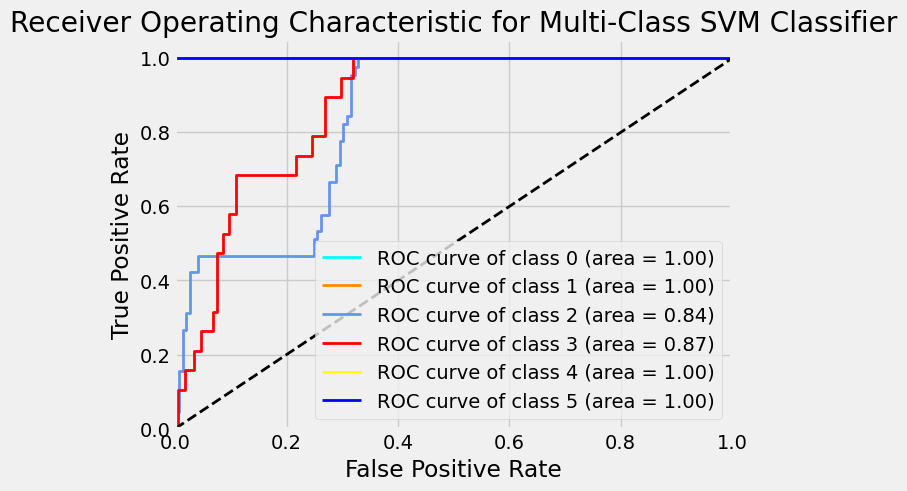

In [129]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Obtain decision scores
y_score = svm_model.decision_function(X_test)

# Compute FPR, TPR, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'yellow', 'blue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class SVM Classifier')
plt.legend(loc="lower right")
plt.show()